In [1]:
pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=84410e30364ec4f81e425f7b2b2997cc2cac3399053960faff03633cec155d15
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [7]:
from numpy import vectorize
import pandas as pd
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [3]:
articles = [
    'Data Science',
    'Artificial Intelligence',
    'Web Programming',
    'European Central Bank',
    'Financial Technology',
    'International Monetary Fund',
    'Basketball',
    'Swimming', 
    'Web Technology'
]

In [4]:
wiki_list = []
title = []
for article in articles:
    print('Loading content : ' , article)
    wiki_list.append(wikipedia.page(article).content)
    title.append(article)

print('examine content')


Loading content :  Data Science
Loading content :  Artificial Intelligence
Loading content :  Web Programming
Loading content :  European Central Bank
Loading content :  Financial Technology
Loading content :  International Monetary Fund
Loading content :  Basketball
Loading content :  Swimming
Loading content :  Web Technology
examine content


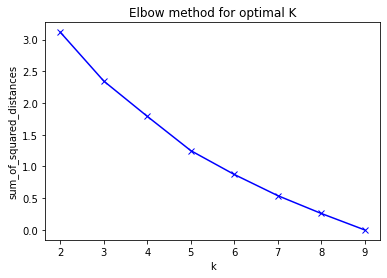

In [5]:
vectorize = TfidfVectorizer(stop_words={'english'})
X = vectorize.fit_transform(wiki_list)

sum_of_squared_distances = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal K')
plt.show()

In [6]:
true_k = 6
model =  KMeans(n_clusters=true_k, init='k-means++', max_iter=200,n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title, labels)), columns=['title', 'cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
0                 Data Science        0
3        European Central Bank        1
5  International Monetary Fund        1
6                   Basketball        1
2              Web Programming        2
8               Web Technology        2
4         Financial Technology        3
7                     Swimming        4
1      Artificial Intelligence        5


Cluster: 0
Titles
Data Science


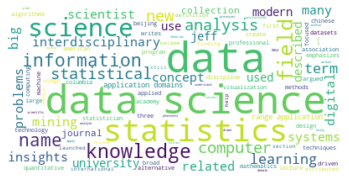

Cluster: 1
Titles
      European Central Bank
International Monetary Fund
                 Basketball


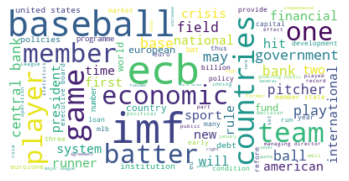

Cluster: 2
Titles
Web Programming
 Web Technology


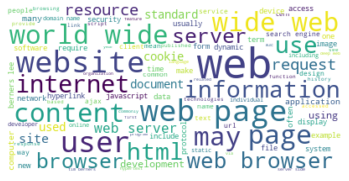

Cluster: 3
Titles
Financial Technology


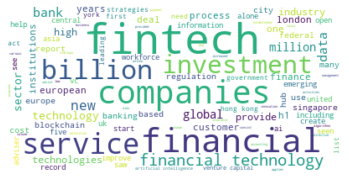

Cluster: 4
Titles
Swimming


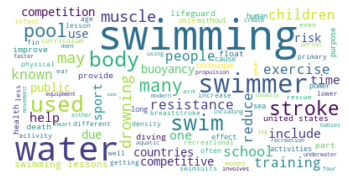

Cluster: 5
Titles
Artificial Intelligence


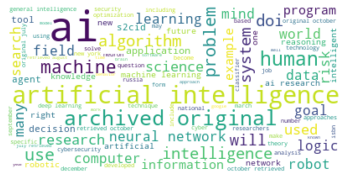

In [8]:
result={'cluster' : labels, 'wiki' : wiki_list}
result=pd.DataFrame(result)
for k in range(0, true_k):
  s=result[result.cluster==k]
  text=s['wiki'].str.cat(sep=' ')
  text=text.lower()
  text=' '.join([word for word in text.split()])
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
  print('Cluster: {}'.format(k))
  print('Titles')
  titles=wiki_cl[wiki_cl.cluster==k]['title']
  print(titles.to_string(index=False))
  plt.figure()
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()